# This is the first notebook created to build a model on the first NUTY dataset

The datset is of 3 categories, KFC_popcorn KFC_burger and Dominos_burger.

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

Imports

In [2]:
from fastai.vision import *
from fastai.metrics import error_rate
from pathlib import Path

Batchsize

In [3]:
bs = 64

In [4]:
path = Path("/home/jupyter/chiller_vision/Image_recog_dataset/")
path.ls()

[PosixPath('/home/jupyter/chiller_vision/Image_recog_dataset/train')]

In [5]:
data = ImageDataBunch.from_folder(path, ds_tfms=get_transforms(), size=224, bs=bs, valid_pct=0.2
                                  ).normalize(imagenet_stats)

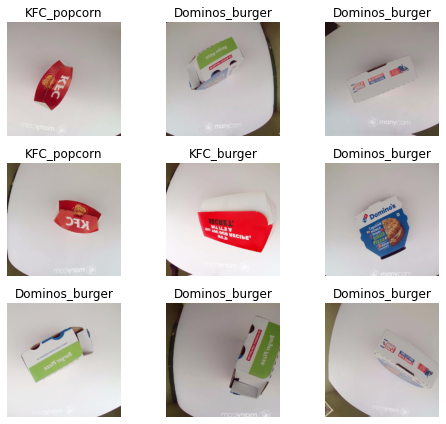

In [6]:
data.show_batch(rows=3, figsize=(7,6))

In [7]:
print(data.classes)
len(data.classes),data.c

['Dominos_burger', 'KFC_burger', 'KFC_popcorn']


(3, 3)

# Training Resnet34

Our first network is a pretrained resnet34 which we dont unfreeze just train on the last few layers.

In [8]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [9]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

In [11]:
learn.fit_one_cycle(10)

epoch,train_loss,valid_loss,error_rate,time
0,0.069784,0.008727,0.000000,00:07
1,0.044949,0.009168,0.000000,00:07
2,0.039280,0.010305,0.000000,00:07
3,0.037911,0.010395,0.000000,00:07
4,0.032036,0.008879,0.000000,00:07
5,0.026319,0.008150,0.000000,00:07
6,0.027299,0.007635,0.000000,00:07
7,0.026211,0.007459,0.000000,00:07
8,0.025762,0.007568,0.000000,00:07
9,0.022287,0.008333,0.000000,00:07


In [12]:
learn.save('stage-1')

# Results

In [13]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

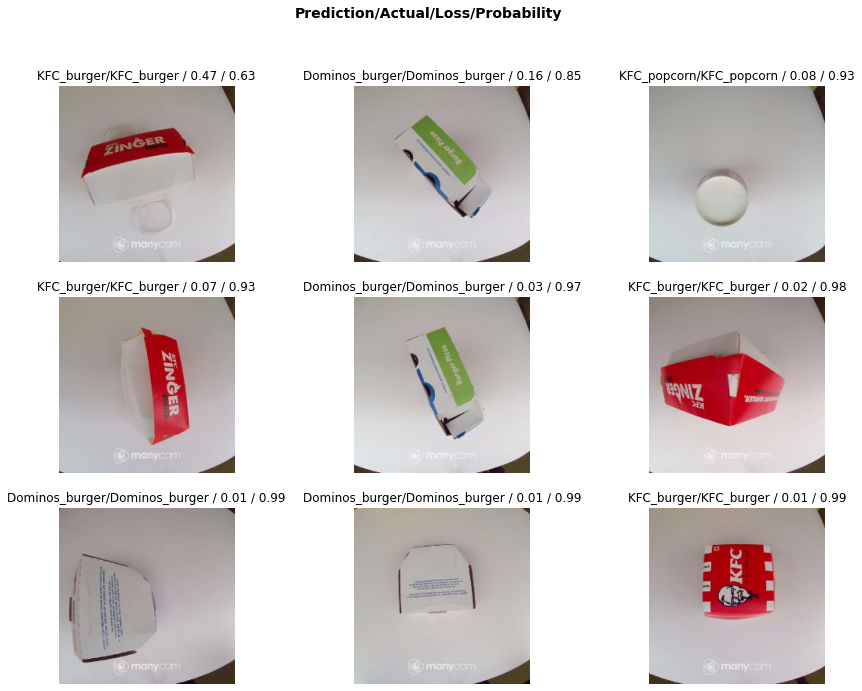

In [14]:
interp.plot_top_losses(9, figsize=(15,11))

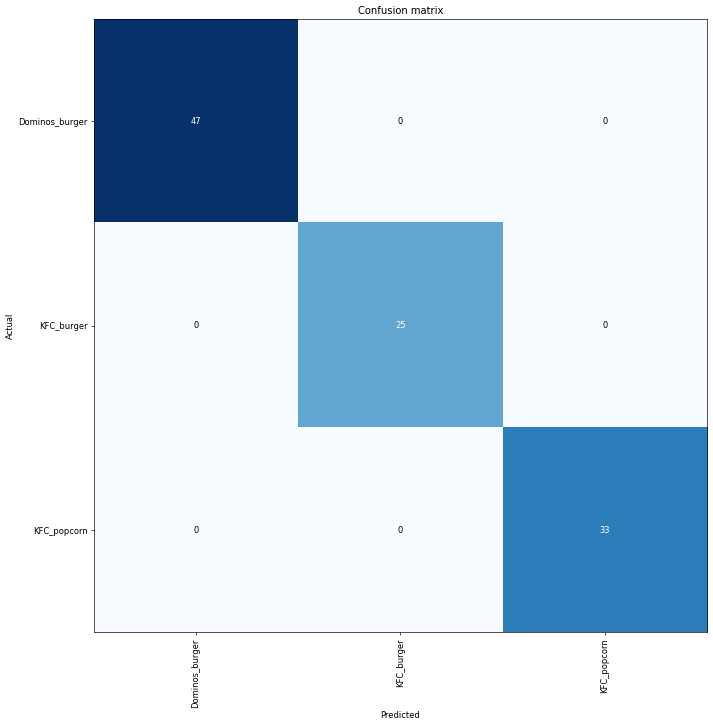

In [15]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [16]:
interp.most_confused(min_val=1)

[]

As seen the model has trained very well on the exisiting data, not confusing anywhere

# Interpretation and testing

We now attempt to test in images pulled from google images and other sources

In [17]:
test_image_path = Path("/home/jupyter/chiller_vision/")

In [34]:
img1 = open_image(test_image_path/"kfc_popcorn_3.jpeg")

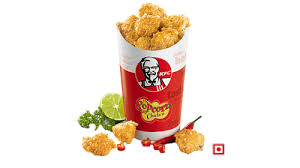

In [35]:
img1

In [36]:
pred_class,pred_idx,outputs = learn.predict(img1)
pred_class

Category tensor(0)

In [37]:
learn.predict(img1)

(Category tensor(0), tensor(0), tensor([8.4460e-01, 2.7732e-05, 1.5537e-01]))